In [1]:
import torch

In [2]:
N=100
radius1=0.3+0.05*torch.randn(int(N/2),1)
radius2=1+0.01*torch.randn(int(N/2),1)
theta1=2*torch.pi*torch.rand(int(N/2),1)-torch.pi
theta2=2*torch.pi*torch.rand(int(N/2),1)-torch.pi
class1_data=torch.hstack([radius1*torch.cos(theta1), radius1*torch.sin(theta1)])
class2_data=torch.hstack([radius2*torch.cos(theta2), radius2*torch.sin(theta2)])
class1_label=torch.ones(int(N/2),1)
class2_label=torch.zeros(int(N/2),1)
X=torch.vstack([class1_data,class2_data])
y=torch.vstack([class1_label,class2_label])

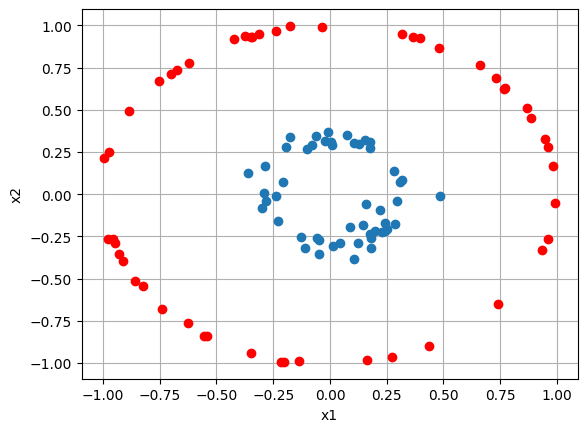

In [3]:
import matplotlib.pyplot as plt
plt.plot(class1_data[:,0],class1_data[:,1],'o')
plt.plot(class2_data[:,0],class2_data[:,1],'ro')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

In [4]:
from torch import nn

class MLP(nn.Module):
    def __init__(self):
        super().__init__()

        # case 1, plain
        self.linear = nn.Sequential(nn.Linear(2, 1),
                                    nn.Sigmoid(),
                                    )

    def forward(self, x):
        x = self.linear(x)
        return x

In [5]:
model = MLP()
print(model)
print(model(torch.randn(5,2)).shape)

MLP(
  (linear): Sequential(
    (0): Linear(in_features=2, out_features=1, bias=True)
    (1): Sigmoid()
  )
)
torch.Size([5, 1])


In [6]:
from torch import optim
import torch.nn.functional as F

LR = 1e-1 # case 1
LR = 1e-2 # case 2, plain 에서 노드 천 개, deep
LR = 1e-4 # case 2, very deep relu
EPOCH = 100 # case 1
EPOCH = 500 # case 2, plain 에서 노드 천 개, deep, very deep relu

# optimizer = optim.SGD(model.parameters(), lr=LR)
optimizer = optim.Adam(model.parameters(), lr=LR) # case 1, deep

loss_history =[]

model.train() # train mode로 전환
for ep in range(EPOCH):
    # inference
    y_hat = model(X)
    # loss
    loss = F.binary_cross_entropy(y_hat, y)
    # update
    optimizer.zero_grad() # gradient 누적을 막기 위한 초기화
    loss.backward() # backpropagation
    optimizer.step() # weight update
    # print loss
    loss_history += [loss.item()]
    print(f"Epoch: {ep+1}, train loss: {round(loss.item(),3)}")
    print("-"*20)

Epoch: 1, train loss: 0.72
--------------------
Epoch: 2, train loss: 0.72
--------------------
Epoch: 3, train loss: 0.72
--------------------
Epoch: 4, train loss: 0.72
--------------------
Epoch: 5, train loss: 0.72
--------------------
Epoch: 6, train loss: 0.72
--------------------
Epoch: 7, train loss: 0.72
--------------------
Epoch: 8, train loss: 0.72
--------------------
Epoch: 9, train loss: 0.72
--------------------
Epoch: 10, train loss: 0.72
--------------------
Epoch: 11, train loss: 0.72
--------------------
Epoch: 12, train loss: 0.72
--------------------
Epoch: 13, train loss: 0.72
--------------------
Epoch: 14, train loss: 0.72
--------------------
Epoch: 15, train loss: 0.72
--------------------
Epoch: 16, train loss: 0.72
--------------------
Epoch: 17, train loss: 0.72
--------------------
Epoch: 18, train loss: 0.72
--------------------
Epoch: 19, train loss: 0.72
--------------------
Epoch: 20, train loss: 0.72
--------------------
Epoch: 21, train loss: 0.72
-

In [7]:
print(F.binary_cross_entropy(y_hat,y))
print(-torch.sum(torch.log(y_hat**y*(1-y_hat)**(1-y)))/N)

tensor(0.7156, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.7156, grad_fn=<DivBackward0>)


Text(0, 0.5, 'loss')

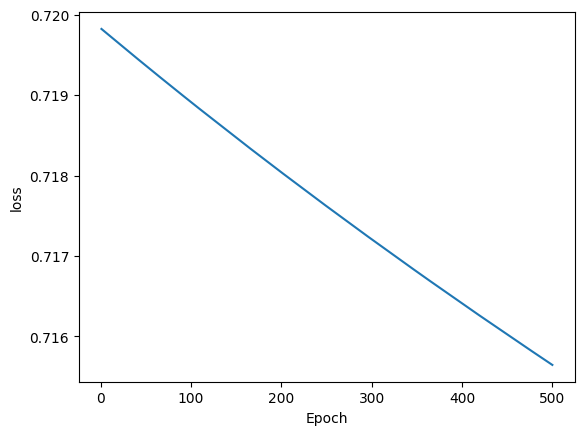

In [8]:
plt.plot(range(1,EPOCH+1),loss_history)
plt.xlabel('Epoch')
plt.ylabel('loss')

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Text(0.5, 0.5, 'x2')

/usr/local/lib/python3.10/dist-packages/mpl_toolkits/mplot3d/proj3d.py:210: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.array([xs, ys, zs, np.ones_like(xs)])
/usr/local/lib/python3.10/dist-packages/mpl_toolkits/mplot3d/proj3d.py:210: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([xs, ys, zs, np.ones_like(xs)])


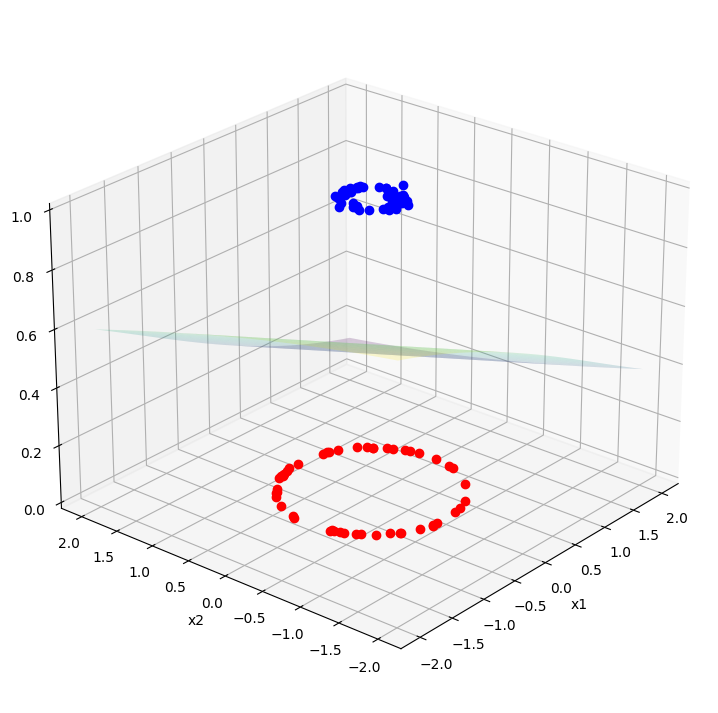

In [9]:
x1_test=torch.linspace(-10,10,30) # case 1
x2_test=torch.linspace(-10,10,30) # case 1
x1_test=torch.linspace(-2,2,30) # case 2
x2_test=torch.linspace(-2,2,30) # case 2
X1_test, X2_test=torch.meshgrid(x1_test,x2_test)
X_test=torch.cat([X1_test.unsqueeze(dim=2), X2_test.unsqueeze(dim=2)], dim=2)

model.eval() # test mode로 # 1. 해결
with torch.no_grad(): # 2. 해결
    y_hat = model(X_test)
# 1. dropout 혹은 BN 같은거 사용했다면 train mode와 test mode 동작이 다르므로 eval()로 mode를 바꿔줘야
# 2. grad_fn 계산 <- 메모리가 불필요하게 쓰인다
Y_hat = y_hat.squeeze()

# print(model.training)
# model.train()
# print(model.training)

plt.figure(figsize=[10, 9]) # figsize=[가로, 세로]
ax = plt.axes(projection="3d")
ax.view_init(elev=25,azim=-140)
ax.plot_surface(X1_test,X2_test, Y_hat.numpy(), cmap="viridis", alpha=0.2)
plt.plot(class1_data[:,0],class1_data[:,1],class1_label.squeeze(),'bo')
plt.plot(class2_data[:,0],class2_data[:,1],class2_label.squeeze(),'ro')
plt.xlabel("x1")
plt.ylabel("x2")

In [10]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(x=X1_test, y=X2_test, z=Y_hat, colorscale="viridis", opacity=0.5)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True, highlightcolor="limegreen", project_z=True))
fig.update_layout(title='binary classification', width=700, height=600)